# Exploratory Data Analysis (EDA) using Python
#### Chukiat Worasucheep (August 2022)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.precision", 2)

In [ ]:
# Read csv file of World's University Ranking 2012-2015 (extract from Kaggle)
#
df = pd.read_csv("uranking12-15.csv")
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# Describe only columns with specific types
df.describe(include=['object', 'bool'])

In [ ]:
# Number of rows (records)
len(df)

# Indexing and retrieving data

A DataFrame can be indexed in a few different ways.

For pandas objects (Series, DataFrame), the indexing operator [] only accepts

1. colname or list of colnames to select column(s)
2. slicing or Boolean array to select row(s), i.e. it only refers to one dimension of the dataframe.

For df[[colname(s)]], the interior brackets are for list, and the outside brackets are indexing operator, i.e. you must use double brackets if you select two or more columns.

<font color='red'>With one column name, single pair of brackets returns a Series, while double brackets return a dataframe.</font>

Ref: https://stackoverflow.com/questions/33417991/pandas-why-are-double-brackets-needed-to-select-column-after-boolean-indexing

In [ ]:
df['institution']   # With one column name, single pair of brackets returns a Series

In [ ]:
df[['institution']]   # With one column name, a double brackets return a dataframe

In [ ]:
df[['year', 'institution', 'score']] # Use list of column names inside the bracket to get more than one columns

## Boolean indexing or conditional filtering

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let's use it to answer the question:

**ค่าเฉลี่ยของ score ของประเทศไทยเท่ากับเท่าใด**

In [ ]:
# 1. Filter only records of Thailand
#
df[df['country']=='Thailand']

In [ ]:
df[df['country']=='Thailand'].mean(numeric_only=True)

## Row indexing by name and by number

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 **(inclusive)** and columns labeled from world_rank to national_rank **(inclusive)"**. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is **not** included).

In [ ]:
df.loc[0:5, 'world_rank':'national_rank']

In [ ]:
df.iloc[0:5, 0:3]

If we need the n first or the n last lines of the data frame, we can use the `df[:n]` or `df[-n:]` construct:

In [ ]:
df[-3:]  # like df.tail(3)

## unique() for distinct values

In [ ]:
# แสดงรายชื่อมหาวิทยาลัยทั้งหมด ไม่ซ้ำ
df['institution'].unique()

In [ ]:
# อยากทราบว่าแต่ละประเทศมีกี่รายการในข้อมูลทั้งหมด แต่ต้องการเพียง Top 10
df['country'].value_counts().head(10)

In [ ]:
# อยากนับจำนวนประเทศทั้งหมดในข้อมูล ทำแบบนี้
df['country'].value_counts().count()

In [ ]:
df['country'].unique()

In [ ]:
len(df['country'].unique()) # อยากนับจำนวนประเทศทั้งหมดในข้อมูล ทำแบบนี้ก็ได้

## Check for "missing values"

In [ ]:
# Numbers of missing values by columns
df.isnull().sum()

In [ ]:
# The frequency of missing values (absolute)
df.isnull().sum().sum()

In [ ]:
# The frequency of missings (relative)
df.isnull().sum() / len(df) * 100

In [ ]:
# Summarized check if there is any missings
df.isna().any().any()

## Drop or remove all rows with missing value

In [ ]:
cleaned = df.dropna()
cleaned.describe()

In [ ]:
# drop rows with only missing values in specific columns
cleaned = df.dropna(subset=['citations', 'patents'])
cleaned.describe()

In [ ]:
# Show only rows with missing value(s)
null_data = df[df.isnull().any(axis=1)]
null_data


## Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [ ]:
df.sort_values(by='alumni_employment')

We can also sort by multiple columns:

In [ ]:
df.sort_values(by=['score', 'quality_of_education'], ascending=[False, True])

In [ ]:
# ให้เรียงคล้ายข้อที่แล้ว แต่ให้ได้ผลลัพธ์แค่ 3 columns i.e. year (เรียงลง), institution (เรียงขึ้น), and score (เรียงลง) และแสดงแค่ 10 อันดับแรกพอ

#df.???

### Filter for only universities in Thailand and Singapore

In [ ]:
ts = df.loc[ (df['country']=='Thailand') | (df['country']=='Singapore')]
len(ts), ts

In [ ]:
ts.to_csv('Th-Sg.csv')

## Basic statistics for DataFrame

In [ ]:
print('max  =', ts['score'].max())
print('min  =', ts['score'].min())
print('mean =', ts['score'].mean())
print('median =', ts['score'].median())
print('p25  =',   ts['score'].quantile(0.25))
print('p50  =',   ts['score'].quantile(0.50))
print('p75  =',   ts['score'].quantile(0.75))
print('p95  =',   ts['score'].quantile(0.95))


### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [ ]:
ts.apply(np.max) 

The `apply` method can also be used to apply a function to each row. Lambda functions are very convenient in such scenarios. เช่นหากเราต้องการเฉพาะที่ชื่อประเทศขึ้นต้นด้วย T, เราสามารถทำแบบนี้ได้...

In [ ]:
ts[ts['country'].apply(lambda c: c[0] == 'T')]   # ต้องการเฉพาะที่ชื่อประเทศขึ้นต้นด้วย T

<p>apply() สามารถประยุกต์ใช้งานได้หลากหลายรูปแบบ ศึกษาเพิ่มเติมต่อได้ใน <p>https://www.geeksforgeeks.org/apply-a-function-to-single-or-selected-columns-or-rows-in-pandas-dataframe

## Basic statistics for NumPy array

In [ ]:
np.random.seed(123)
data = np.random.normal(0, 1, 1000)

print(data.min(), '\n', data.max())

In [ ]:
print(data.mean())
print(data.std())
print(data.var())  # variance

In [ ]:
# median for NumPy ndarray, UNLIKE that's for DataFrame


In [ ]:
# quantile 0.25 or percentile for NumPy ndarray, UNLIKE that's for DataFrame


In [ ]:
# quantile 0.75 or percentile for NumPy ndarray, UNLIKE that's for DataFrame


## Stat's skewness() and kurtosis()
In statistics, <b>skewness</b> is a measure of the asymmetry of the probability distribution of a random variable about its mean. <b>Kurtosis</b> describes the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.

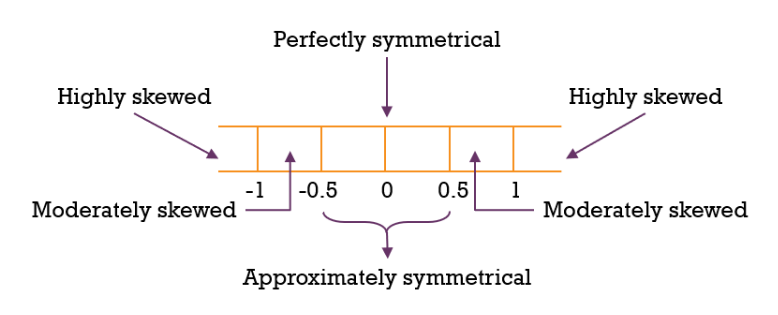

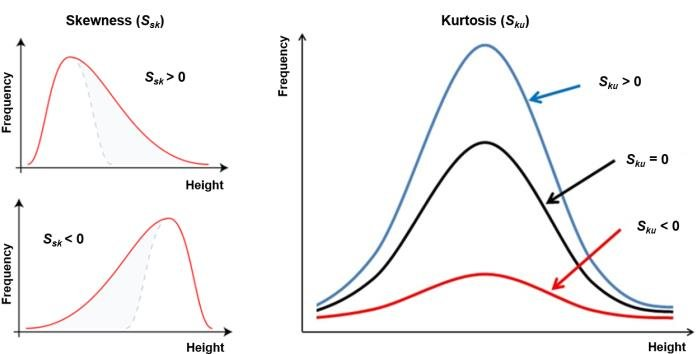

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

np.random.seed(123)
data = np.random.normal(0, 1, 1000)

print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ", skew(data))
print("kurt : ", kurtosis(data))

In [ ]:
plt.hist(data, bins=20)

In [ ]:
neg = np.concatenate((data, [5] * 10))

#neg = np.concatenate((data, [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

print("mean : ", np.mean(neg))
print("var  : ", np.var(neg))
print("skew : ", skew(neg))
print("kurt : ", kurtosis(neg))

In [ ]:
plt.hist(neg, bins=40)

## Correlation Coefficient
In statistics, <b>correlation</b> shows whether and how strongly pairs of variables are related, e.g.
1. height and weight of a person
2. age and salary
3. (years and mileage) and resale price
4. temperate and sales of ice cream.

Value of the correlation coefficient is between -1 and 1.

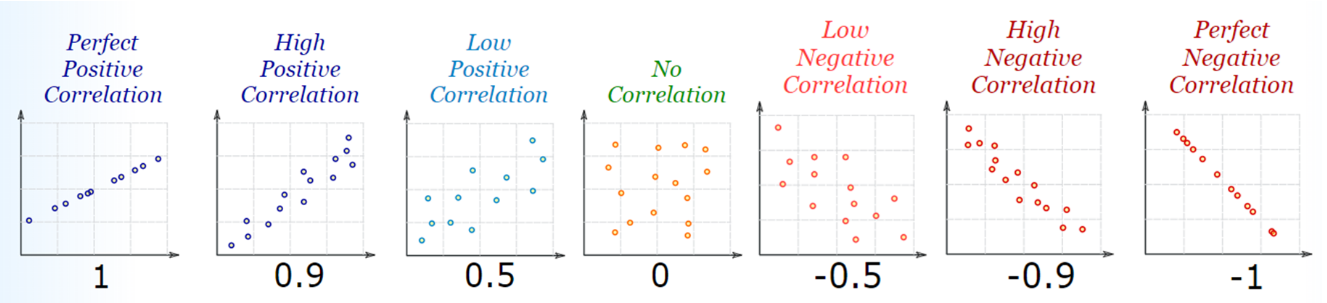

Pearson correlation coefficient between two variables X and Y can be calculated using the following formula. X bar is the mean value of X and Y bar is the mean value of Y. Xi and Yi represents different values of X and Y.
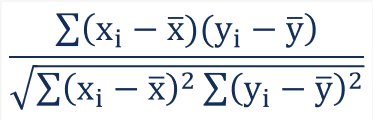

<h3>Why we often use correlation in data science?</h3>
<ol>
    <li>Correlation is used in <b>linear regression</b> models to determine the strength of the relationship between the dependent and independent variables. 
    <li>Correlation is often used in machine learning to identify <b>multicollinearity</b>, which is when two or more predictor variables are highly correlated with each other. Multicollinearity can impact the accuracy of predictive models, so it’s important to identify and remove predictors that are associated with high multicollinearity. 

### Two common ways of calculating (Pearson) correlation coefficient:
1. numpy.corrcoef()
2. Pandas’s dataframe.corr()

### NumPy's corrcoef() functions

In [ ]:
import numpy as np

np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 200)

In [ ]:
# To have y to be x plus some positive-correlation noise
y = x + np.random.normal(0, 5, 200)

np.corrcoef(x, y)

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
# Now let's try negative correlation

np.random.seed(1)

x = np.random.randint(0, 50, 200)      # random integers between 0 and 50

y = 100 - x + np.random.normal(0, 5, 200)  # Negative correlation with some noise

np.corrcoef(x, y)

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
x = np.random.randint(0, 50, 200)
y = np.random.randint(0, 50, 200)

np.corrcoef(x, y)

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
# Numpy correlation of more than 2 varialbes is okay

z = x + y

np.corrcoef(x, [y, z])

### Pandas’s dataframe.corr()

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(1)
n = 200

df = pd.DataFrame({'a': np.random.randint(0, 50, n)})
df['pos'] = df['a'] + np.random.normal(0, 10, n)      # positively correlated with 'a'
df['neg'] = 100 - df['a'] + np.random.normal(0, 5, n) # negatively correlated with 'a'
df['unr'] = np.random.randint(0, 50, n)               # not correlated with 'a'

df

In [ ]:
df.corr()

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='plasma')

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(9, 9))
plt.show()

# GroupBy Function

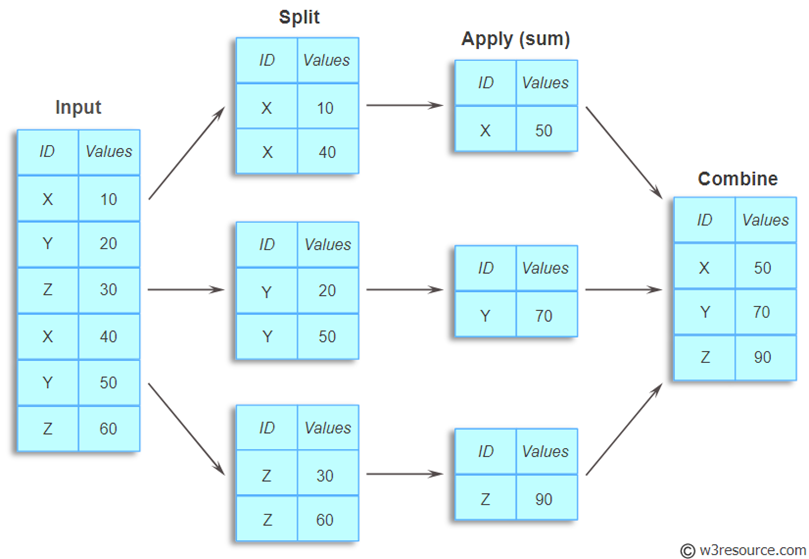

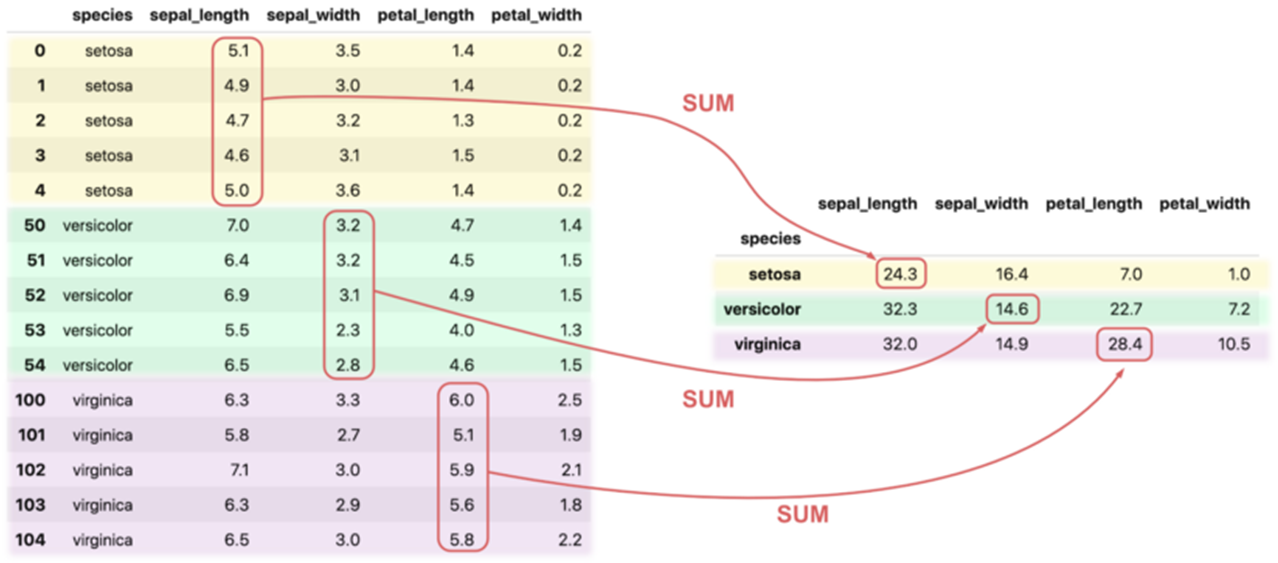

In [ ]:
data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'kings', 
                 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank'  : [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year'  : [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points': [876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(data)
df

In [ ]:
# call groupby() to the dataframe and its get_group() to show the groups
yg = df.groupby('Year')
yg.get_group(2014)

In [ ]:
df.groupby('Team').count()

In [ ]:
df.groupby('Team')['Points'].count()

#### Use .aggregate function with mainly NumPy functions to the group

In [ ]:
df.groupby('Team')['Points'].sum()  # Series

In [ ]:
df.groupby('Team')[['Points']].sum()  # DataDrame

In [ ]:
df.groupby('Team')['Points'].agg(np.mean) # APPLY mostly with aggregate function

In [ ]:
df.groupby('Team')['Points'].agg([np.size, np.mean])

In [ ]:
df.groupby(['Team', 'Year'])['Points'].agg([np.size, np.mean])

In [ ]:
df.groupby(['Year', 'Team'])['Points'].agg([np.size, np.mean])

In [ ]:
# เขียน .group() เต็มชุดเลยก็ได้ช่วยให้ชัดเจน แต่ยาว
#
df.groupby('Team')['Points'].agg([np.size, np.mean, np.std, max, min])

#### Use groupby's filter function with lambda for more complicated tasks

In [ ]:
df.groupby('Team').filter(lambda x: len(x) >= 3) # กรองเฉพาะทีมที่มี > 3 รายการ

In [ ]:
# for more complicated task, it's suggested to use temporary variables
#
more3 = df.groupby('Team').filter(lambda x: len(x) >= 3) # กรองเฉพาะทีมที่มี > 3 รายการ
more3.sort_values(by='Year')